<a href="https://colab.research.google.com/github/Naybellez/Classification/blob/DS_analysis/Forest_copyVGG16_Copy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# hyperparameter sweep on Forest dataset

date = 250723
save_location = r'/content/drive/MyDrive/IDSW/Saves'


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install torch --user
!pip install numpy --user
!pip install sklearn --user
!pip install random --user
!pip install matplotlib.pyplot --user
!pip install wget --user
!pip install zipfile --user
!pip install opencv-python --user
!pip install tensorflow --user
!pip install keras --user
!pip install umap-learn

In [2]:
# imports

import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
#import wget
import pandas as pd

import os
from torch.nn import functional
from zipfile import ZipFile
import cv2

import tensorflow as tf

import pickle
#import umap.umap_ as umap
import seaborn as sns

#from boxsdk import OAuth2, Client

In [3]:
print(torch.version)

<module 'torch.version' from '/usr/local/lib/python3.10/dist-packages/torch/version.py'>


In [ ]:
oauth =OAuth2(
    client_id= 'hw534w4beg3mscd8v265vpkk8ndzc5y1',
    client_secret = 'nmL4fcHjb2drntVJxGSqQvjt19t0hIlu',

    access_token='peeNgYwYGush1YZx3HRtdzqVcxoF986v'
    )

client = Client(oauth)
user = client.user().get()
print('Current User: ', user.id)

Current User:  20207730442


In [ ]:
folderID = '205117553143'

folder = client.folder(folder_id= folderID).get()
items = client.folder(folder_id=folderID).get_items()

def download_files(dataFolder, file_id):
      for idx, item in enumerate(dataFolder):


          if file_id in item.name.lower():
              print('Idx', idx)

              item_content = client.file(item.id).get()
              with open(os.path.join('/content/drive/MyDrive/IDSW',item.name), 'wb') as open_file:
                item_content.download_to(open_file)
                open_file.close()

download_files(items,'210623')

Idx 557
Idx 558
Idx 559
Idx 560
Idx 561
Idx 562
Idx 563
Idx 564
Idx 565
Idx 566
Idx 567
Idx 608
Idx 609
Idx 610
Idx 611


KeyboardInterrupt: ignored

In [ ]:
# download all files

folderID = '205117553143'

folder = client.folder(folder_id= folderID).get()

print(f'Folder "{folder.name}" has {folder.item_collection["total_count"]} items in it')

items = client.folder(folder_id=folderID).get_items()

def labelData(dataFolder):
  files = []
  for idx, item in enumerate(dataFolder):
      #print(f'{item.type.capitalize()} {item.id} is named "{item.name}"', idx)

      item_content = client.file(item.id).get()
      #print('FIle', file_id)


      # download files

      ######  ----- Potentially this can be altered to avoid item_content.download_to(open_file) as it is quite a slow process
      #####         And all that's happening here is getting out labels. don't necessarily need to download right yet, just need to get
      ###           the filenames.

      ##            Gosh, mabs I was wrong and this is needed later. potench ignore.
      #if '260623' in item.name.lower():

      print('Idx')

      with open(os.path.join('/content/drive/MyDrive/IDSW',item.name), 'wb') as open_file:
        item_content.download_to(open_file)
        open_file.close()

      # label and file name added to list dict
      if item.name[0:4] == 'IDSW':
        if 'test' not in item.name.lower():
            if item.name[6] == '1':
                files.append({'label': 0, 'file_name' : item.name})
            if item.name[6] == '2':
                files.append({'label': 1, 'file_name' : item.name})
            if item.name[6] =='3':
                files.append({'label': 2, 'file_name' : item.name})
            if item.name[6] =='4':
                files.append({'label': 3, 'file_name' : item.name})
            if item.name[6] =='5':
                files.append({'label': 4, 'file_name' : item.name})
            if item.name[6] =='6':
                files.append({'label': 5, 'file_name' : item.name})
            if item.name[6] =='7':
                files.append({'label': 6, 'file_name' : item.name})
            if item.name[6] =='8':
                files.append({'label': 7, 'file_name' : item.name})
            if item.name[6] =='9':
                files.append({'label': 8, 'file_name' : item.name})
            if item.name[6] =='10':
                files.append({'label': 9, 'file_name' : item.name})
            if item.name[6] =='11':
                files.append({'label': 10, 'file_name' : item.name})
  else:
        # check for any missed item
        print(item.name, 'xxxxxxxxxxxxxx')

  return files

# put file names in list
# load files when needed

Folder "locationData" has 691 items in it


In [ ]:
files = labelData(items)

Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx
Idx


In [43]:
file_path = r'/content/drive/MyDrive/IDSW/'

labels= []
images = []
for file in os.listdir(file_path):
    if file[0:4] == 'IDSW':
        i=int(file[5:7]) -1
        i = str(i)
        labels.append(i)

for i in os.listdir(file_path):
    if i[0:4] == 'IDSW':
        j=file_path+i
        images.append(j)

label_arr =np.array(labels)
image_arr = np.array(images)

In [44]:
for file in os.listdir(file_path):
    if file[0:4] == 'IDSW':
        #print(file)
        i=int(file[5:7]) -1
        i = str(i)
        #print(i)

In [ ]:
print(len(label_arr))

683


In [45]:
random_seed = 42

x_train, x_test, y_train, y_test = train_test_split(image_arr, label_arr, test_size=0.3,
                                                    random_state=42) #, stratify=np.array(label_arr)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.1, train_size=0.9,
                                      random_state=random_seed, shuffle = True) #,stratify=np.array(label_arr)[y_train]



In [ ]:
#### UMAP STUFF

"""
So, got umap working in both 2d and 3d and had it run over its hyperparameter 'num neighbors' for a number of values.

Unfortunately it really just did not seem to do a very good job at it anywhere.

There are various moments within the graphs, where a little bit of structure and seperation of classes does
seem to be emerging. But just not really very well.

Thoughts on this:

1) Umap just takes in data of the form [samples, features], wheras the cifar and forest data is all of the form
[samples, width, height, channels] and so you are having to smoosh down width, height and channels into one column
in order to feed a sample in, and this loss of structure is understandably going to make it harder to understand images?
But at the same time, it did manage to do an ok job on mnist.

    - thoughts. MNIST is [samples, w, h, 1], the channels can be removed so is hust [samples, w, h]. just smooshing w and h.

2) Assuming that it does well on seperating out mnist, and at least ok on seperating out Cifar, maybe this can be viewed
as evidence that this dataset is a much harder dataset to seperate. probably could work out some metric to
establish how well clustered the datapoints are with the umapped version of each dataset and just treat that number as
a 'how challenging is this dataset to learn?' sort of thing.

But.... also.. maybe just drop umap for now. It doesn't appear to be working terribly well with the forest data,
and while that maybe is nice evidence that this dataset is more difficult than mnist,
that doesn't necessarily mean very much, cus we kinda already know that because the forest dataset is, like,
over 10 x smaller.


Would there be any difference if using an embedding from near the end of the network? we could then see how the network
has seporated the images in space? (if looking atg input data isn't coming out clear?)

"""

In [ ]:
#UMAP

data = []
for img in x_train:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (64, 64))
    img = img.astype('float32')
    img = img/255.0
    #img = np.transpose(img, (2,0,1))
    data.append(img)


import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Choose a cmap
cmap = cm.get_cmap('hsv')    #'tab11')

colors = [cmap(float(l) / 10) for l in y_train]

data = np.array(data)
target = np.unique(y_train).tolist

flattened = data.reshape(data.shape[0], -1)

print('Data processing complete')


Data processing complete


/tmp/ipykernel_343214/1771856233.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')    #'tab11')


In [ ]:
print(flattened.shape)

(430, 12288)


/tmp/ipykernel_333309/4166615073.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')    #'tab11')


In [ ]:
#2d version. this is a function and the 3d is a for loop a couple of cells below. its a bit messy, but that's what we've got
#right now. This function was originally intended to work for 2d and 3d, but it does not.
#So don't change n_components (Which is the number of umap output dimensions) here, because its designed for 2.

def Umapping(data_2d, n_components = 2, n_neighbors = 15, min_dist = 0.1):

    embedding = umap.UMAP(n_components = n_components, n_neighbors = n_neighbors, min_dist = min_dist).fit_transform(data_2d)

    fig = plt.figure()

    if n_components == 3:
        ax = plt.figure().add_subplot(projection='3d')
        plt.scatter(embedding.T[0], embedding.T[1], embedding.T[2], c=colors) # ,  s=0.3 c=target, cmap='Spectral', alpha=1.0)
    else:
        ax = plt.figure().add_subplot()
        plt.scatter(embedding.T[0], embedding.T[1], c=colors) # ,  s=0.3 c=target, cmap='Spectral', alpha=1.0)
    space = np.linspace(0,1,10)
    plt.setp(ax, xticks=[], yticks=[])
    cbar = plt.colorbar(boundaries = space)
    cbar.set_ticks(space)
    cbar.set_ticklabels([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    plt.title('Forest Embedded via UMAP');


    # Adjust azimuth and elevation - These are the camera angle looking at the 3d graph.
    ax.azim = 180
    ax.elev =  90


<Figure size 640x480 with 0 Axes>

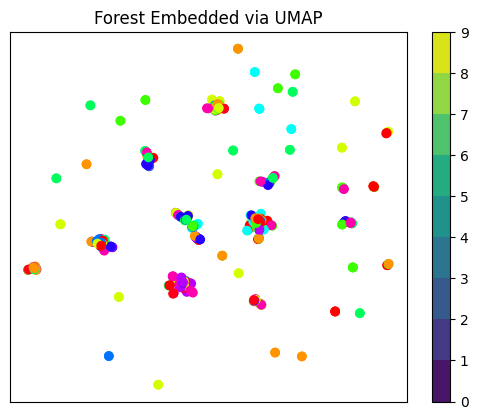

<Figure size 640x480 with 0 Axes>

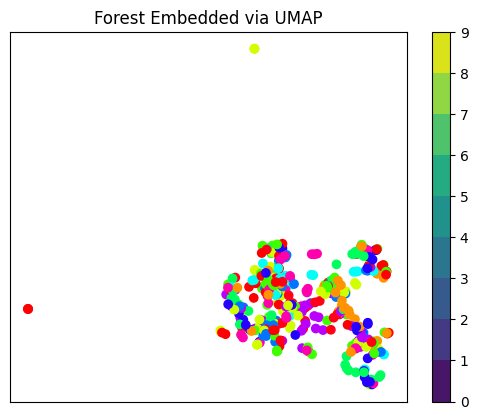

<Figure size 640x480 with 0 Axes>

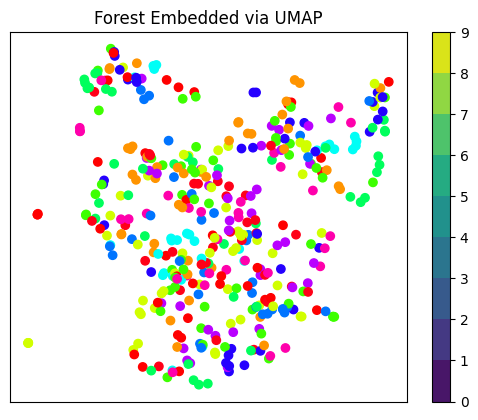

<Figure size 640x480 with 0 Axes>

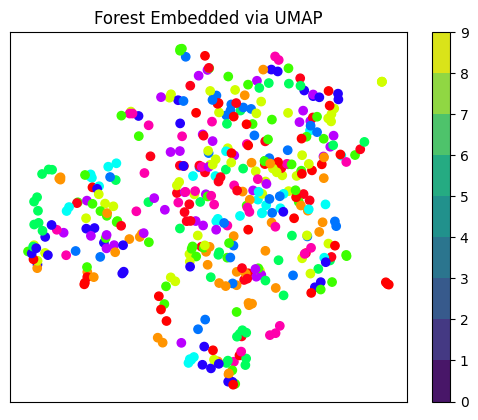

<Figure size 640x480 with 0 Axes>

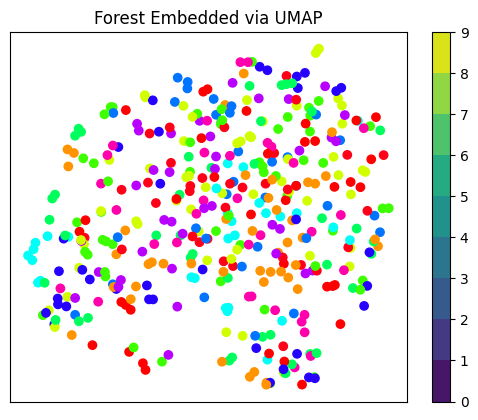

<Figure size 640x480 with 0 Axes>

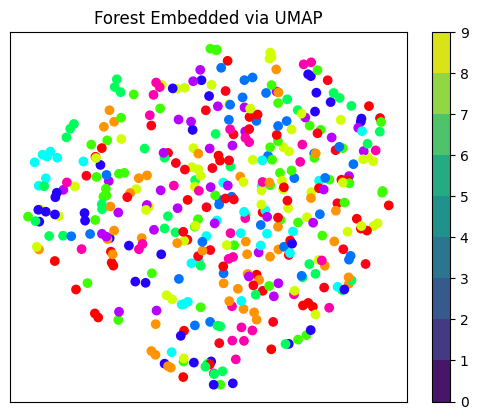

<Figure size 640x480 with 0 Axes>

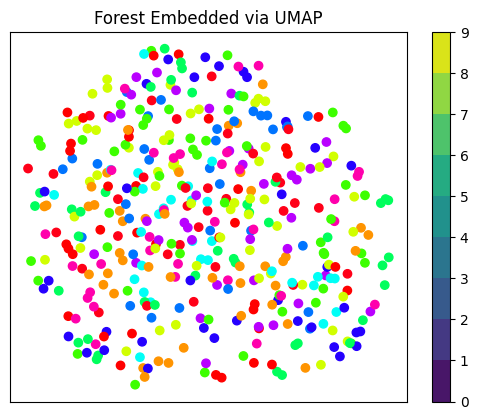

<Figure size 640x480 with 0 Axes>

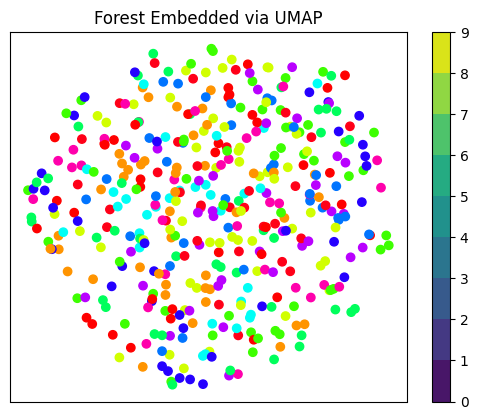

<Figure size 640x480 with 0 Axes>

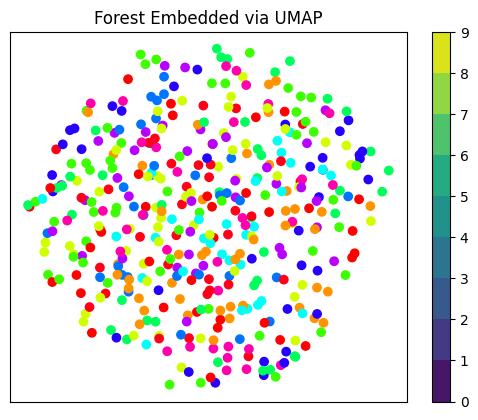

In [ ]:

for n in (2, 3, 4, 5, 10, 20, 50, 100, 200):
    Umapping(flattened, n_neighbors = n)

----------------------------------------------
UMAP hyperParam Sweep
Num Neighbors:  2


/its/home/nn268/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/tmp/ipykernel_333309/3748350854.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')
/tmp/ipykernel_333309/3748350854.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=embedding.T[0], ys=embedding.T[1], zs=embedding.T[2], c=colors, cmap=plt.cm.hsv, alpha = 0.5)
/tmp/ipykernel_333309/3748350854.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal s

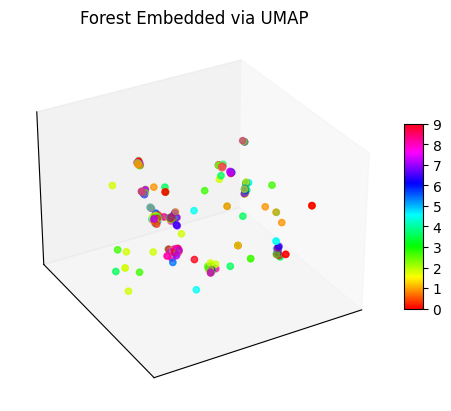

/tmp/ipykernel_333309/3748350854.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')
/tmp/ipykernel_333309/3748350854.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=embedding.T[2], ys=embedding.T[0], zs=embedding.T[1], c=colors, cmap=cmap, alpha = 0.5 )
/tmp/ipykernel_333309/3748350854.py:47: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable, shrink=0.5, aspect=10)


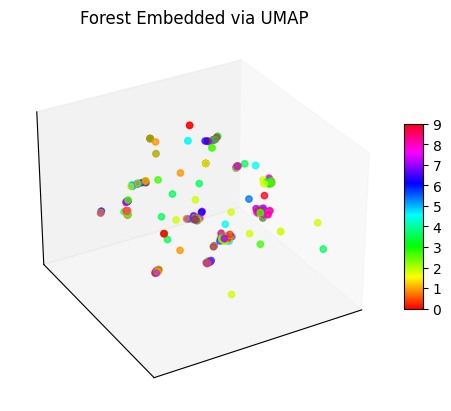

----------------------------------------------
UMAP hyperParam Sweep
Num Neighbors:  3


/tmp/ipykernel_333309/3748350854.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')
/tmp/ipykernel_333309/3748350854.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=embedding.T[0], ys=embedding.T[1], zs=embedding.T[2], c=colors, cmap=plt.cm.hsv, alpha = 0.5)
/tmp/ipykernel_333309/3748350854.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable, shrink=0.5, aspect=10)


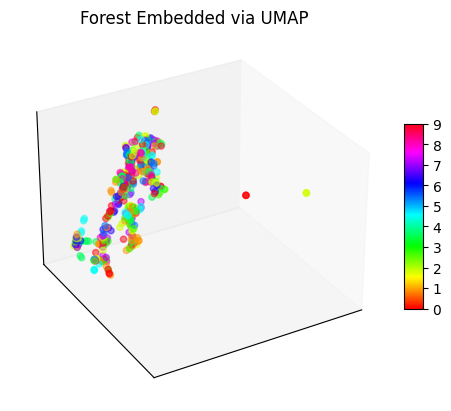

/tmp/ipykernel_333309/3748350854.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')
/tmp/ipykernel_333309/3748350854.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=embedding.T[2], ys=embedding.T[0], zs=embedding.T[1], c=colors, cmap=cmap, alpha = 0.5 )
/tmp/ipykernel_333309/3748350854.py:47: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable, shrink=0.5, aspect=10)


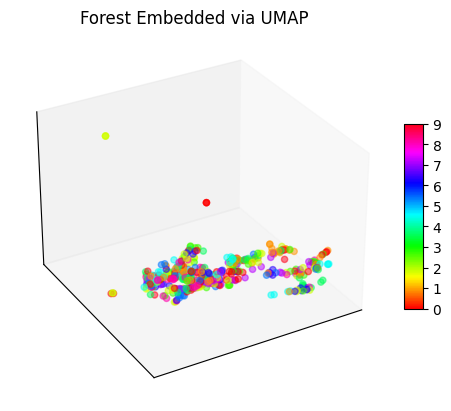

----------------------------------------------
UMAP hyperParam Sweep
Num Neighbors:  4


/tmp/ipykernel_333309/3748350854.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')
/tmp/ipykernel_333309/3748350854.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=embedding.T[0], ys=embedding.T[1], zs=embedding.T[2], c=colors, cmap=plt.cm.hsv, alpha = 0.5)
/tmp/ipykernel_333309/3748350854.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable, shrink=0.5, aspect=10)


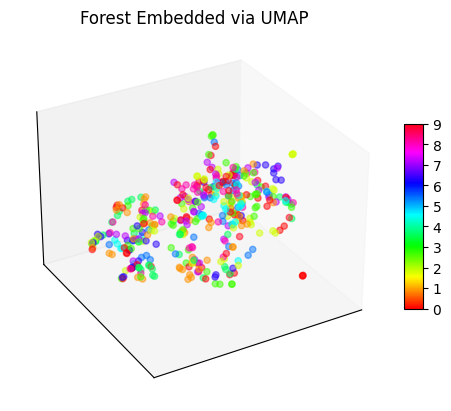

/tmp/ipykernel_333309/3748350854.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')
/tmp/ipykernel_333309/3748350854.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=embedding.T[2], ys=embedding.T[0], zs=embedding.T[1], c=colors, cmap=cmap, alpha = 0.5 )
/tmp/ipykernel_333309/3748350854.py:47: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable, shrink=0.5, aspect=10)


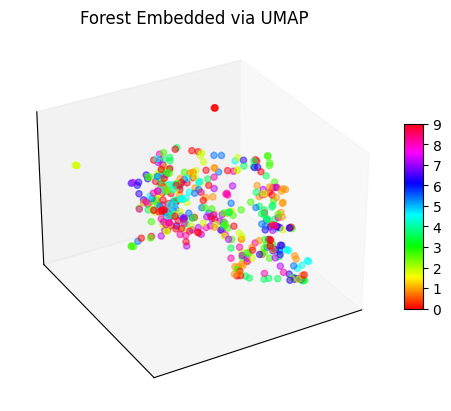

----------------------------------------------
UMAP hyperParam Sweep
Num Neighbors:  5


/tmp/ipykernel_333309/3748350854.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')
/tmp/ipykernel_333309/3748350854.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=embedding.T[0], ys=embedding.T[1], zs=embedding.T[2], c=colors, cmap=plt.cm.hsv, alpha = 0.5)
/tmp/ipykernel_333309/3748350854.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable, shrink=0.5, aspect=10)


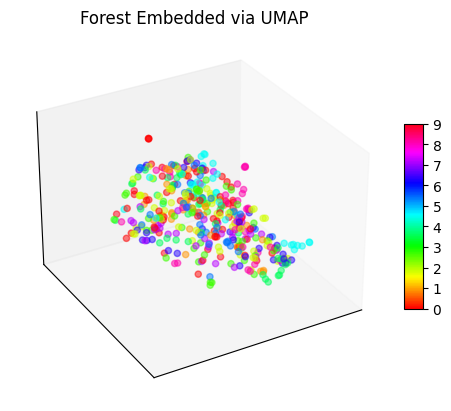

/tmp/ipykernel_333309/3748350854.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')
/tmp/ipykernel_333309/3748350854.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=embedding.T[2], ys=embedding.T[0], zs=embedding.T[1], c=colors, cmap=cmap, alpha = 0.5 )
/tmp/ipykernel_333309/3748350854.py:47: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable, shrink=0.5, aspect=10)


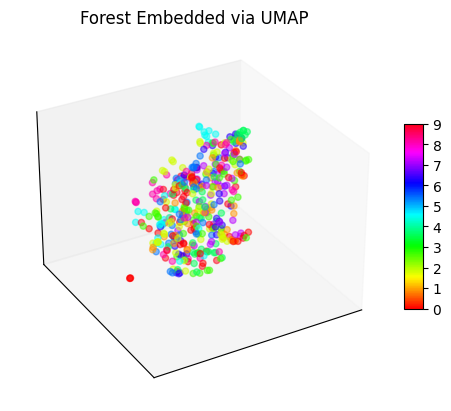

----------------------------------------------
UMAP hyperParam Sweep
Num Neighbors:  10


/tmp/ipykernel_333309/3748350854.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')
/tmp/ipykernel_333309/3748350854.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=embedding.T[0], ys=embedding.T[1], zs=embedding.T[2], c=colors, cmap=plt.cm.hsv, alpha = 0.5)
/tmp/ipykernel_333309/3748350854.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable, shrink=0.5, aspect=10)


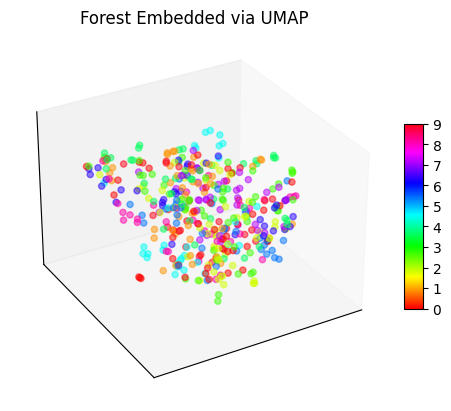

/tmp/ipykernel_333309/3748350854.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')
/tmp/ipykernel_333309/3748350854.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=embedding.T[2], ys=embedding.T[0], zs=embedding.T[1], c=colors, cmap=cmap, alpha = 0.5 )
/tmp/ipykernel_333309/3748350854.py:47: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable, shrink=0.5, aspect=10)


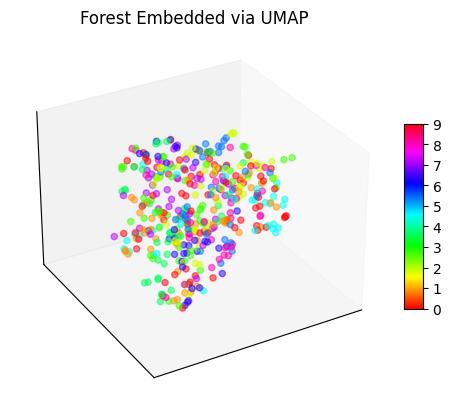

----------------------------------------------
UMAP hyperParam Sweep
Num Neighbors:  20


/tmp/ipykernel_333309/3748350854.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')
/tmp/ipykernel_333309/3748350854.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=embedding.T[0], ys=embedding.T[1], zs=embedding.T[2], c=colors, cmap=plt.cm.hsv, alpha = 0.5)
/tmp/ipykernel_333309/3748350854.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable, shrink=0.5, aspect=10)


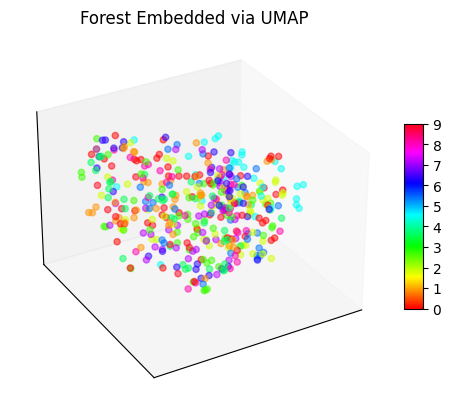

/tmp/ipykernel_333309/3748350854.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')
/tmp/ipykernel_333309/3748350854.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=embedding.T[2], ys=embedding.T[0], zs=embedding.T[1], c=colors, cmap=cmap, alpha = 0.5 )
/tmp/ipykernel_333309/3748350854.py:47: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable, shrink=0.5, aspect=10)


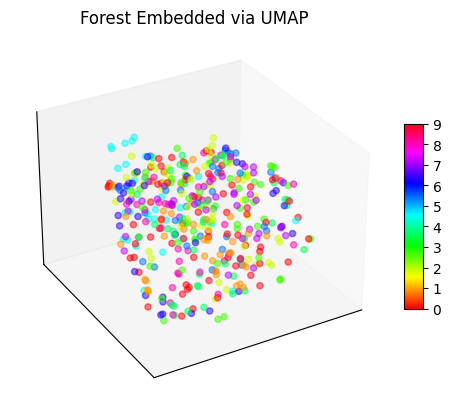

----------------------------------------------
UMAP hyperParam Sweep
Num Neighbors:  50


/tmp/ipykernel_333309/3748350854.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')
/tmp/ipykernel_333309/3748350854.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=embedding.T[0], ys=embedding.T[1], zs=embedding.T[2], c=colors, cmap=plt.cm.hsv, alpha = 0.5)
/tmp/ipykernel_333309/3748350854.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable, shrink=0.5, aspect=10)


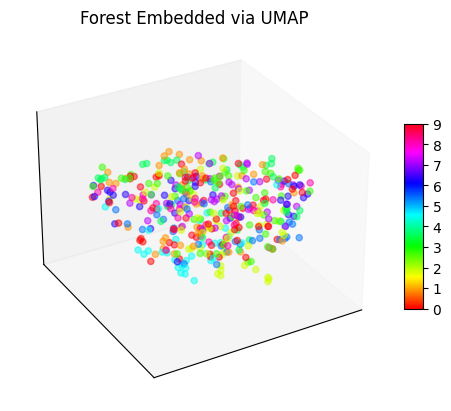

/tmp/ipykernel_333309/3748350854.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')
/tmp/ipykernel_333309/3748350854.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=embedding.T[2], ys=embedding.T[0], zs=embedding.T[1], c=colors, cmap=cmap, alpha = 0.5 )
/tmp/ipykernel_333309/3748350854.py:47: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable, shrink=0.5, aspect=10)


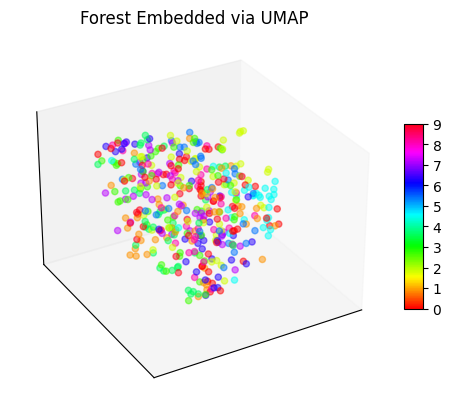

----------------------------------------------
UMAP hyperParam Sweep
Num Neighbors:  100


/tmp/ipykernel_333309/3748350854.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')
/tmp/ipykernel_333309/3748350854.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=embedding.T[0], ys=embedding.T[1], zs=embedding.T[2], c=colors, cmap=plt.cm.hsv, alpha = 0.5)
/tmp/ipykernel_333309/3748350854.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable, shrink=0.5, aspect=10)


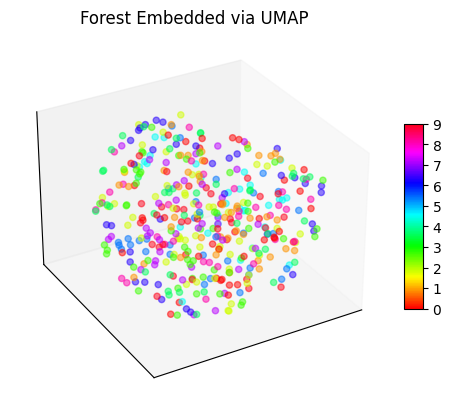

/tmp/ipykernel_333309/3748350854.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')
/tmp/ipykernel_333309/3748350854.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=embedding.T[2], ys=embedding.T[0], zs=embedding.T[1], c=colors, cmap=cmap, alpha = 0.5 )
/tmp/ipykernel_333309/3748350854.py:47: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable, shrink=0.5, aspect=10)


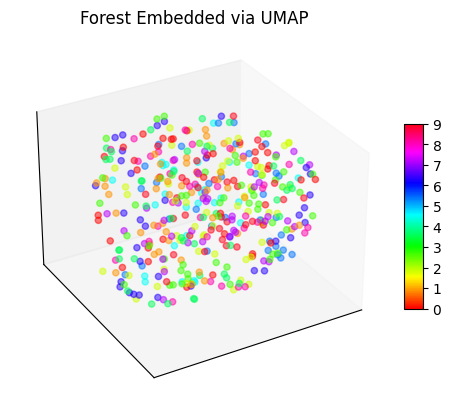

----------------------------------------------
UMAP hyperParam Sweep
Num Neighbors:  200


/tmp/ipykernel_333309/3748350854.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')
/tmp/ipykernel_333309/3748350854.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=embedding.T[0], ys=embedding.T[1], zs=embedding.T[2], c=colors, cmap=plt.cm.hsv, alpha = 0.5)
/tmp/ipykernel_333309/3748350854.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable, shrink=0.5, aspect=10)


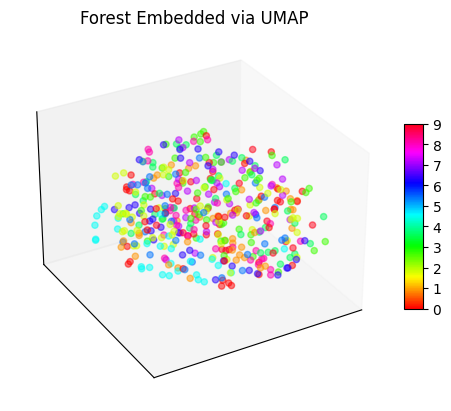

/tmp/ipykernel_333309/3748350854.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')
/tmp/ipykernel_333309/3748350854.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=embedding.T[2], ys=embedding.T[0], zs=embedding.T[1], c=colors, cmap=cmap, alpha = 0.5 )
/tmp/ipykernel_333309/3748350854.py:47: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable, shrink=0.5, aspect=10)


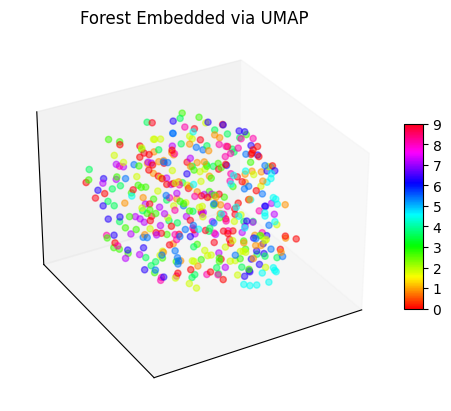

In [ ]:

# UMAP
###  3D VERSION

from mpl_toolkits.mplot3d import Axes3D

for n in (2, 3, 4, 5, 10, 20, 50, 100, 200):

    print('----------------------------------------------')
    print('UMAP hyperParam Sweep')
    print('Num Neighbors: ', n)
    embedding = umap.UMAP(n_components = 3, n_neighbors = n, min_dist = 0.1).fit_transform(flattened)


    fig = plt.figure()

    ax = fig.add_subplot(projection='3d')

    cmap = cm.get_cmap('hsv')
    ax.scatter(xs=embedding.T[0], ys=embedding.T[1], zs=embedding.T[2], c=colors, cmap=plt.cm.hsv, alpha = 0.5)
    mappable = plt.cm.ScalarMappable(cmap=cmap)
    # Create colorbar
    cbar = fig.colorbar(mappable, shrink=0.5, aspect=10)

    plt.setp(ax, xticks=[], yticks=[], zticks=[])

    cbar.set_ticks(np.linspace(0, 1, 10))
    cbar.set_ticklabels([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

    plt.title('Forest Embedded via UMAP');

    # Adjust azimuth and elevation
    ax.azim = 60
    ax.elev = 30

    plt.show()

    ## This repeat is just swapping round which dimensions are on which axis
    # So basically same as above, but with a different view

    fig = plt.figure()

    ax = fig.add_subplot(projection='3d')

    cmap = cm.get_cmap('hsv')
    ax.scatter(xs=embedding.T[2], ys=embedding.T[0], zs=embedding.T[1], c=colors, cmap=cmap, alpha = 0.5 )
    mappable = plt.cm.ScalarMappable(cmap=cmap)
    # Create colorbar
    cbar = fig.colorbar(mappable, shrink=0.5, aspect=10)

    plt.setp(ax, xticks=[], yticks=[], zticks=[])

    cbar.set_ticks(np.linspace(0, 1, 10))
    cbar.set_ticklabels([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

    plt.title('Forest Embedded via UMAP');

    # Adjust azimuth and elevation
    ax.azim = 60
    ax.elev = 30

    plt.show()






In [ ]:
##End of Umap stuff

In [ ]:
print('train: ', len(x_train),type(x_train), len(y_train), type(y_train))
print('val: ', len(x_val),type(x_val), len(y_val),type(y_val))
print('test: ', len(x_test),type(x_test), len(y_test),type(y_test))


print(x_train[0].shape)
print(x_val.shape)
print(x_test.shape)

train:  430 <class 'numpy.ndarray'> 430 <class 'numpy.ndarray'>
val:  48 <class 'numpy.ndarray'> 48 <class 'numpy.ndarray'>
test:  205 <class 'numpy.ndarray'> 205 <class 'numpy.ndarray'>
()
(48,)
(205,)


In [ ]:
print(y_train[1][0])

1


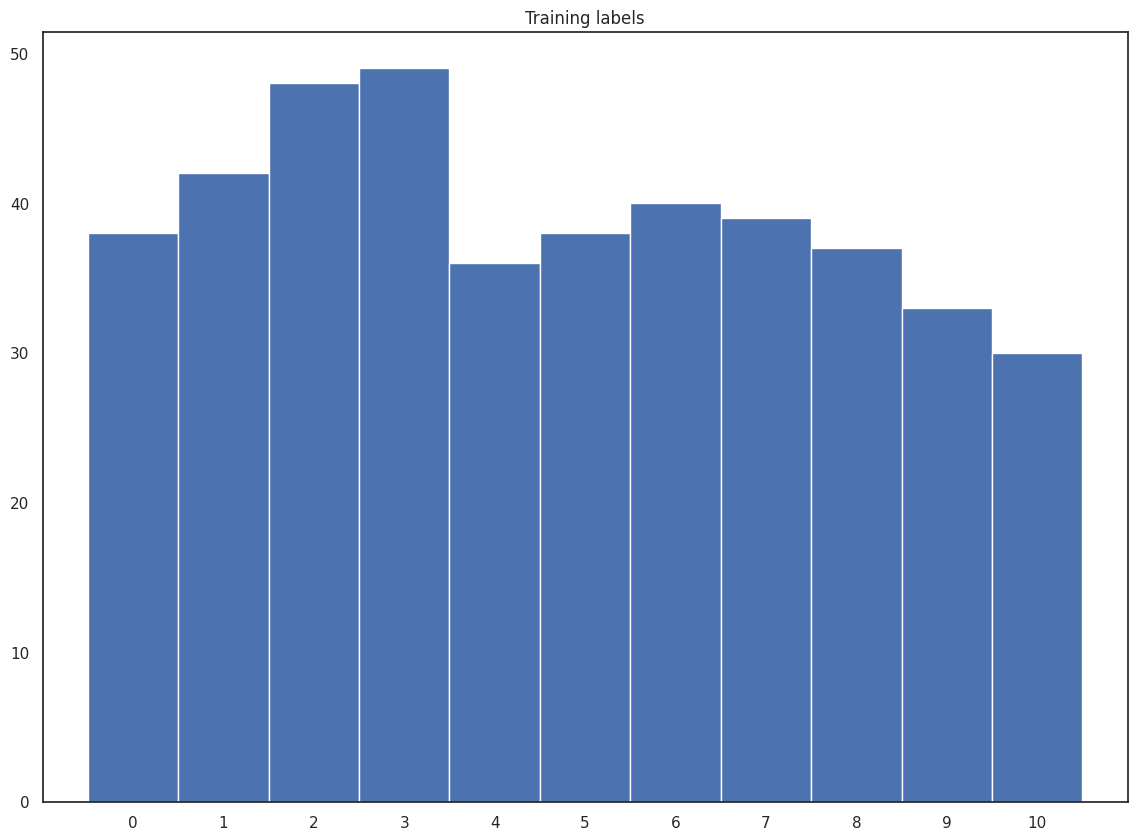

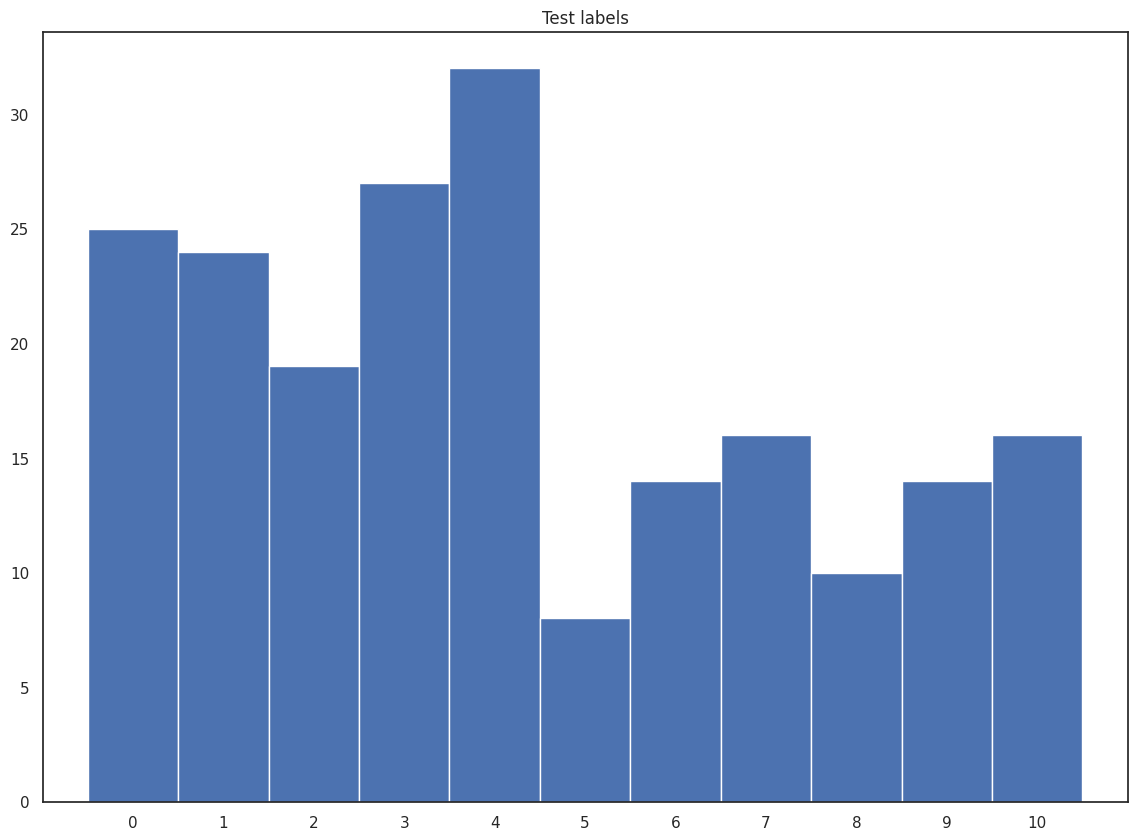

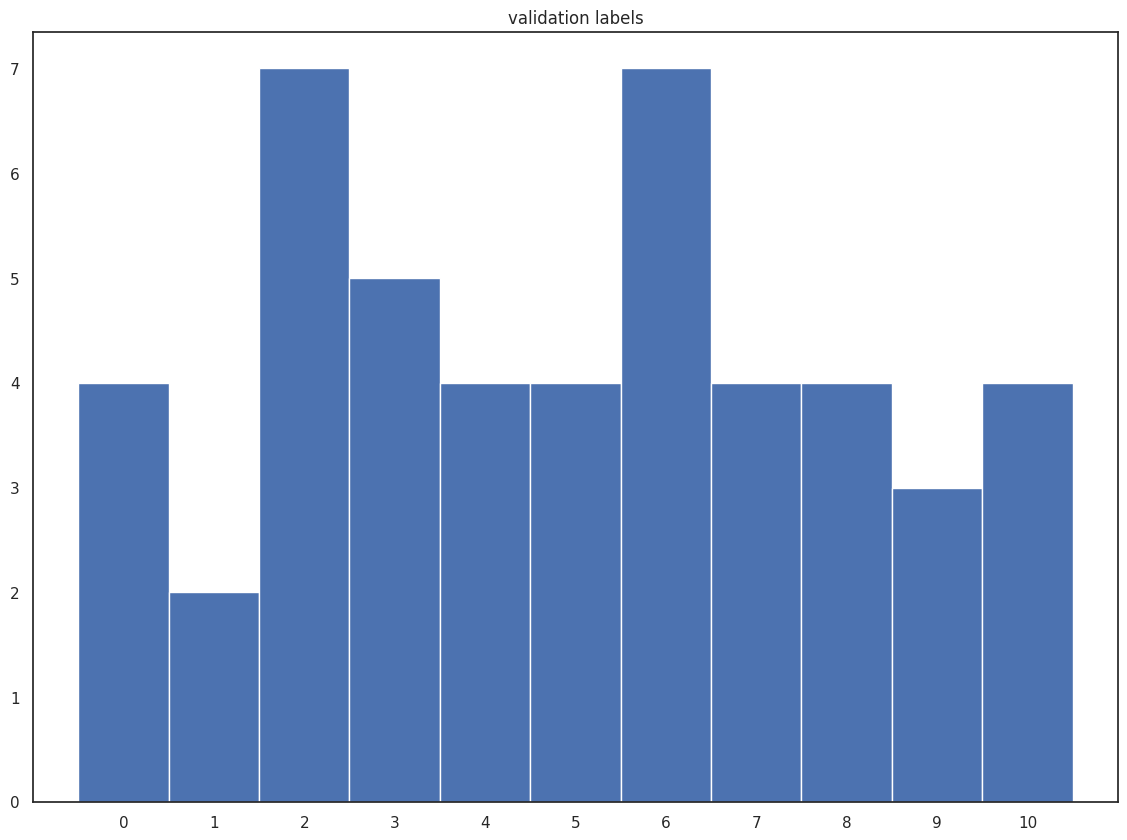

In [ ]:
def label_dist_plot(data, label):
  plt.figure()

  data = [int(x) for x in data]
  _, _, _ = plt.hist(data, bins=[0, 1, 2,3,4,5,6,7,8,9,10,11], align='left')
  plt.xticks(np.unique(data))
  plt.xlim(left=min(np.unique(data))-1, right=max(np.unique(data))+1)
  plt.title(label)
  plt.show()


label_dist_plot(y_train, 'Training labels')
label_dist_plot(y_test, 'Test labels')
label_dist_plot(y_val, 'validation labels')

In [ ]:
print(y_train[:10])

['8' '0' '8' '7' '1' '0' '0' '7' '9' '0']


In [ ]:

for i in range(10):
    tenso = tensoring(x_train[i])
    tenso = tenso.squeeze()
    tenso= tenso.permute(1, 2, 0)    ######### <<--------- The change
    tenso = np.array(tenso.cpu()) * 2

    #img = cv2.imread(tenso)
    #print(img.shape)

    #tenso = tenso.reshape(32, 32, 3)
    plt.imshow(tenso, cmap=plt.get_cmap('viridis'))
    plt.show()

In [ ]:
print(x_train[0])

/content/drive/MyDrive/IDSWIDSW006_280423_1428_mid_005.JPG


In [ ]:
# look at imgs

for i in range(9):
  plt.subplot(330 + 1 + i)
  print(x_train[i])
  img = cv2.imread(x_train[i])
  #print(img)
  #print(img.shape)
  plt.imshow(img, cmap=plt.get_cmap('gray'))
  plt.show()



In [5]:
def tensoring(input):
        input = cv2.imread(input)
        input = cv2.resize(input, (64, 64))
        input = input.astype('float32')
        #input = input/255
        img_tensor = torch.tensor(input)
        img_tensor = img_tensor.to(torch.float32)
        img_tensor = functional.normalize(img_tensor)
        img_tensor = img_tensor.permute(2, 0, 1)    ######### <<--------- The change
        img_tensor = img_tensor.reshape(1, 3, 64, 64)
        img_tensor = img_tensor.to(device)

        return img_tensor


In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [6]:
def label_tensor_float(lab):
    lab = int(lab)
    label = torch.tensor(lab)
    label = label.to(torch.float32)
    label = label.to(device)
    return label
#IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`)
#and integer or boolean arrays are valid indices

def label_oh_tf(lab):
    num_classes = 11
    one_hot = np.zeros(num_classes)
    lab = int(lab)
    one_hot[lab] = 1
    label = torch.tensor(one_hot)
    label = label.to(torch.float32)
    label = label.to(device) #
    return label



In [23]:
# Define model - copy of what worked on MNIST
embed_list = []

class ShapePrint(nn.Module):
  def __init__(self):
    super(ShapePrint, self).__init__()
  def forward(self, x):
    print(x.shape)
    return x

class xPrint(nn.Module):
  def __init__(self):
    super(xPrint, self).__init__()
  def forward(self, x):
    print(x)
    embed_list.append(x)
    return x

# ptrblck code for saving layer output from a sequential block

act_out = {}
def get_hook(name):
    def hook(m, input, output):
        act_out[name] = output.detach()
    return hook


class TorchNet(nn.Module):
    def __init__(self):
        super(TorchNet, self).__init__()
        self.flatten = nn.Flatten()

        self.conv_layers = nn.Sequential(  #
              nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2),
              nn.ReLU(),
              nn.Dropout(p=0.5),
              nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=2),
              nn.ReLU(),
              nn.Conv2d(in_channels =64, out_channels=64, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2, 2),
              nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=2),
              nn.ReLU(),
              nn.Conv2d(in_channels =128, out_channels=128, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2,2),
              nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=2),
              nn.ReLU(),
              nn.Conv2d(in_channels =256, out_channels=256, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2,2),
              nn.Dropout(p=0.5),
          )

        self.linear_1 = nn.Sequential(
            nn.Linear(16384, 100),
            nn.ReLU(),
            nn.Linear(100,100),
            nn.ReLU(),
            xPrint(),
            nn.Dropout(p=0.5),
            nn.Linear(100,11),
            nn.Softmax(),

        )

    def forward(self, x):
      x= self.conv_layers(x)
      x = x.flatten()
      x = x.squeeze()
      x = self.linear_1(x)
      return x




In [24]:
mod_blank =TorchNet().to(device)


In [21]:
print(mod_blank)



TorchNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (14): ReLU()
    (15): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (16): ReLU()
    (17): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (18): Dropout(p=0

In [27]:

class vgg16TorchNet(nn.Module):
    def __init__(self):
        super(vgg16TorchNet, self).__init__()
        self.flatten = nn.Flatten()

        self.conv_layers = nn.Sequential(  #
              nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2),
              nn.ReLU(), #inplace=True
              nn.Dropout(p=0.5),
              nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=2),
              nn.ReLU(), #inplace=True
              nn.Conv2d(in_channels =64, out_channels=64, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2, 2),
              nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=2),
              nn.ReLU(), #inplace=True
              nn.Conv2d(in_channels =128, out_channels=128, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2,2),
              nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=2),
              nn.ReLU(), #inplace=True
              nn.Conv2d(in_channels =256, out_channels=256, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2,2),
              nn.Dropout(p=0.5), # [256, 128, 3, 3], expected input[1, 64, 9, 9]
          )

        self.linear_1 = nn.Sequential(    #1x16384 and 4096x100)
            nn.Linear(16384, 100),
            nn.ReLU(),
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(100,11),
            nn.Softmax(),

        )

    def forward(self, x):
      #forward method. opposition to backward pass
      #print(x.shape)
      #print('in: ',x.shape)
      x= self.conv_layers(x)
      #print('post conv:  ',x.shape)
      x = x.flatten()
      x = x.squeeze()
      #print('pre flatten:', x.shape)
      #print('conv x', x.shape)
      x = self.linear_1(x)
      #print('out: ',x.shape)
      #print('lin1 x', x)
      return x


In [28]:
modx = vgg16TorchNet().to(device)
print(modx)

vgg16TorchNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (14): ReLU()
    (15): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (16): ReLU()
    (17): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (18): Dropou

In [ ]:
print(model_state_dict)

In [ ]:
# sending sinlge picture through network

#lab = y_train[0]
im = tensoring(x_train[0])
mod(im)

In [12]:
# train loop
def train_loop(model, x_train, y_train, epoch, optimizer, loss_fn):
  model = model
  x_train = x_train
  y_train = y_train

  model.train()

  predict_list = []
  total_count = 0
  num_correct = 0
  current_loss = 0

  total_samples = len(x_train)

  for idx, img in enumerate(x_train):

      tense = tensoring(img)
      #print(tense.shape)

      """
      img = np.array(tense.to('cpu').squeeze()[i])
      print(img.shape)
      plt.subplot(330 + 1)
      plt.imshow(img, cmap=plt.get_cmap('gray'))
      plt.show()
      """

      prediction = model.forward(tense)
      label = label_oh_tf(y_train[idx])

      loss = loss_fn(prediction, label)
      predict_list.append(prediction.argmax())

      #print('\n ---------------------------------------------------------------')
      #print('             Epoch: ', epoch, '  Sample: ', idx)

      if prediction.argmax() == label.argmax():
          print(f'\n ########################### HIT ###########################  -- {idx} / {total_samples} \n')
          num_correct +=1
      else:
        #print('\n ########################### MISS ########################### \n')
        pass

      total_count+=1

      #print(prediction, '\n Prediction:  ', prediction.argmax())
      #print('Label: ',label.argmax())
      #print('Loss: ', loss.item())
      #print('---------------------------------------------------------------')
      #print(" |||| ||||| ||||| ||||| ||||| ||||| |||| |||| ||||| |||| |||| ")

      current_loss += loss.item()
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()


  return current_loss, predict_list, num_correct, model, optimizer





In [13]:
# validation loop

def validation_loop(model, x_val, y_val, epoch, loss_fn):
  model = model
  x_val = x_val
  y_val = y_val

  model.eval()

  predict_list = []
  total_count = 0
  num_correct = 0
  current_loss = 0

  for idx, img in enumerate(x_val):

      tense_img = tensoring(img)
      prediction = model.forward(tense_img)
      label = label_oh_tf(y_val[idx])

      loss = loss_fn(prediction, label)
      predict_list.append(prediction.argmax())

      #print('\n ---------------------------------------------------------------')
      #print('             Epoch: ', epoch, '  Sample: ', idx)

      if prediction.argmax() == label.argmax():
          #print('\n ########################### HIT ########################### \n')
          num_correct +=1
      else:
        #print('\n ########################### MISS ########################### \n')
        pass
      total_count+=1

      #print('ArgPrediction: ', prediction.argmax()) #, prediction,'ARRRGGGG',
      #print('Label: ',label.argmax())
      #print('Loss: ', loss.item())
      #print('---------------------------------------------------------------')
      #print(" |||| ||||| ||||| ||||| ||||| ||||| |||| |||| ||||| |||| |||| ")

      current_loss += loss.item()

  return current_loss, predict_list, num_correct





In [ ]:
t_loss_list = []
t_predict_list =[]
t_accuracy_list = []

v_loss_list = []
v_predict_list =[]
v_accuracy_list = []

total_epochs = 0

title = f'forest_v15_FORESTds_120723'
save_dict = {'Run' : title,
            'Current_Epoch': 0}

In [ ]:
# training

from IPython.display import clear_output

#fresh_model = True

"""if model == None or fresh_model == True:
    model =vgg16TorchNet().to(device)"""
    #model = model.to(device)
#model =vgg16TorchNet().to(device)
date = 240723

epochs= 1
total_epochs = total_epochs
learning_rate= 1e-4   #5e-5
loss_fn = torch.nn.MSELoss()   #torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)  #, weight_decay=1e-5)#, weight_decay=1e-5)
optim= 'Adam'

"""
print('\n')
print('LR: ', learning_rate)
print('optimiser: ', optimizer)
print('loss fn: ', loss_fn)
"""
for epoch in range(epochs):
  #print('lr: ',learning_rate, 'optim: ',optim, 'loss fn: ',loss_fn)
  print('EPOCH: ', epoch)
  print('----------------------')
  print(' \n                  TRAINING... \n')
  print('----------------------')
  train_loss, train_predict_loss, train_num_correct, model, optimizer = train_loop(model, x_train, y_train, epoch, optimizer, loss_fn)
  t_loss_list.append(train_loss)
  t_predict_list.append(train_predict_loss)
  t_accuracy_list.append(train_num_correct / len(y_train))
  final_train_acc = t_accuracy_list[-1]

  print('----------------------')
  print(' \n                  VALIDATION... \n')
  print('----------------------')
  val_loss, val_predict_loss, val_num_correct = validation_loop(model, x_val, y_val, epoch, loss_fn)
  v_loss_list.append(val_loss)
  v_predict_list.append(val_predict_loss)
  v_accuracy_list.append(val_num_correct/ len(y_val))
  final_val_acc = v_accuracy_list[-1]

  total_epochs += 1 ### Total epochs is from a previous save


  save_dict['Current Epoch'] = total_epochs
  save_dict['model.state_dict'] = model.state_dict()
  save_dict['training_samples'] = len(x_train)
  save_dict['validation_samples'] = len(x_val)
  save_dict['t_loss_list'] = t_loss_list
  save_dict['t_predict_list'] = t_predict_list
  save_dict['t_accuracy_list'] = t_accuracy_list
  save_dict['v_loss_list'] = v_loss_list
  save_dict['v_predict_list'] = v_predict_list
  save_dict['v_accuracy_list'] = v_accuracy_list
  #save_dict['epochCount']+=1 Now using current_epoch above

  if epoch == epochs-1:  ### Mabs change this to something like epoch == epochs, so that it only saves the final?
      version = f'extra64lay_epoch{total_epochs}_lr{str(learning_rate)}_{optim}_{str(loss_fn)}+_Acc_{final_train_acc}_{final_val_acc}'

      with open(f'{save_location}/_IDSWforest_epoch{epoch}_{date}_{version}.pkl', 'wb') as f:
        pickle.dump(save_dict, f)



  clear_output()




NameError: ignored

In [ ]:
print(pickle.__doc__)

Create portable serialized representations of Python objects.

See module copyreg for a mechanism for registering custom picklers.
See module pickletools source for extensive comments.

Classes:

    Pickler
    Unpickler

Functions:

    dump(object, file)
    dumps(object) -> string
    load(file) -> object
    loads(bytes) -> object

Misc variables:

    __version__
    format_version
    compatible_formats




In [ ]:
with open(save_location+f'/forest_colab_HyperparameterSweep_test.pkl', 'wb') as f:
     pickle.dump('ues', f)

print(save_location+f'/forest_colab_HyperparameterSweep_test.pkl')

print(os.listdir(save_location))

/content/drive/MyDrive/IDSW/Saves/forest_colab_HyperparameterSweep_test.pkl
['forest_colab_HyperparameterSweep_test.pkl']


In [ ]:
# Hyperparameter sweep

##### remember to make the pickle folder before running!
##### adapt train loopppp

import pickle
from IPython.display import clear_output
full_label = y_train

def hyperparameter_sweep():
    # a function to loop through hyperparameters for finding the best ones for certain architecture

    epochs = 30

    lr_list = [1e-4]    #[1e-6, 5e-3, 5e-4, 1e-4, 1e-5] #1e-7, 1e-6, #1e-7,1e-6,1e-5,1e-4,1e-3,1e-2, 5e-4, 5e-3, 5e-2
    optimiser_list = ['Adam'] #, 'SGD'
    lossfn_list = [torch.nn.MSELoss()] #, torch.nn.NLLLoss(), ,

    best_optim = None
    best_lossfn = None
    best_lr = 0
    best_valaccuracy = 0
    best_epoch = 0

    for loss_fn in lossfn_list:
        for optim in optimiser_list:
            for learning_rate in lr_list:



                model = vgg16TorchNet().to(device) #model architecture
                t_loss_list = []
                t_predict_list =[]
                t_accuracy_list = []

                v_loss_list = []
                v_predict_list =[]
                v_accuracy_list = []

                total_epochs = 0
                title = f'forest_colab_HyperParameterSweep_{str(learning_rate)}_Adam_wd30plus_{str(loss_fn)}lecun'
                save_dict = {'Run' : title,
                            'Current_Epoch': 0}
                optim_list=[]
                if optim =='Adam':
                    optimizer1 = torch.optim.Adam(model.parameters(), lr=learning_rate)
                    optimizer2 = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=1e-5)
                    optim_list.append(optimizer1)
                    optim_list.append(optimizer2)
                """elif optim == 'SGD':
                    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)"""
                for optimizer in optim_list:


                    print('\n')
                    print('LR: ', learning_rate)
                    print('optimiser: ', optim)
                    print('loss fn: ', loss_fn)

                    for epoch in range(epochs):
                      print('lr: ',learning_rate, 'optim: ',optim, 'loss fn: ',loss_fn)
                      print('EPOCH: ', epoch)
                      print('----------------------')
                      print(' \n                  TRAINING... \n')
                      print('----------------------')
                      train_loss, train_predict_loss, train_num_correct, model, optimizer = train_loop(model, x_train, y_train, epoch, optimizer, loss_fn)
                      t_loss_list.append(train_loss)
                      t_predict_list.append(train_predict_loss)
                      t_accuracy_list.append(train_num_correct / len(y_train))


                      print('----------------------')
                      print(' \n                  VALIDATION... \n')
                      print('----------------------')
                      val_loss, val_predict_loss, val_num_correct = validation_loop(model, x_val, y_val, epoch, loss_fn)
                      v_loss_list.append(val_loss)
                      v_predict_list.append(val_predict_loss)
                      v_accuracy_list.append(val_num_correct/ len(y_val))

                      if v_accuracy_list[-1] > best_valaccuracy:
                            best_valaccuracy = v_accuracy_list[-1]
                            best_optim = optimizer
                            best_lossfn = loss_fn
                            best_lr = learning_rate
                            best_epoch = epoch

                      total_epochs += 1 ### Total epochs is from a previous save


                      save_dict['Current Epoch'] = total_epochs
                      save_dict['model.state_dict'] = model.state_dict()
                      save_dict['training_samples'] = len(x_train)
                      save_dict['validation_samples'] = len(x_val)
                      save_dict['t_loss_list'] = t_loss_list
                      save_dict['t_predict_list'] = t_predict_list
                      save_dict['t_accuracy_list'] = t_accuracy_list
                      save_dict['v_loss_list'] = v_loss_list
                      save_dict['v_predict_list'] = v_predict_list
                      save_dict['v_accuracy_list'] = v_accuracy_list
                      #save_dict['epochCount']+=1 Now using current_epoch above

                      final_train_acc = round(t_accuracy_list[-1],3)
                      final_val_acc = round(v_accuracy_list[-1],3)
                      version =f'forest_v15_epoch{total_epochs}_lr{str(learning_rate)}_{optim}_{str(loss_fn)}_Acc_{final_train_acc}_{final_val_acc}'

                      if epoch==epochs-1:
                          with open(save_location+f'/forest_colab_final_{date}_{version}.pkl', 'wb') as f:
                            pickle.dump(save_dict, f)



                      clear_output()


    print('Top results from hyperparameter sweep:')
    print()
    print(best_optim, best_lossfn, best_lr, best_valaccuracy, best_epoch)
    return best_optim, best_lossfn, best_lr, best_valaccuracy, best_epoch, v_loss_list, t_loss_list, v_accuracy_list, t_accuracy_list



best_optim, best_lossfn, best_lr, best_valaccuracy, best_epoch,v_loss_list, t_loss_list, v_accuracy_list, t_accuracy_list = hyperparameter_sweep()


lr:  0.0001 optim:  Adam loss fn:  MSELoss()
EPOCH:  3
----------------------
 
                  TRAINING... 

----------------------

 ########################### HIT ###########################  -- 7 / 430 


 ########################### HIT ###########################  -- 25 / 430 


 ########################### HIT ###########################  -- 33 / 430 


 ########################### HIT ###########################  -- 39 / 430 


 ########################### HIT ###########################  -- 40 / 430 


 ########################### HIT ###########################  -- 47 / 430 



In [ ]:
print(t_loss_list)

## Graphs

In [ ]:
print(run_name)

forest_colab_HyperParameterSweep_0.0001_Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 1e-05
)_MSELoss()lecun


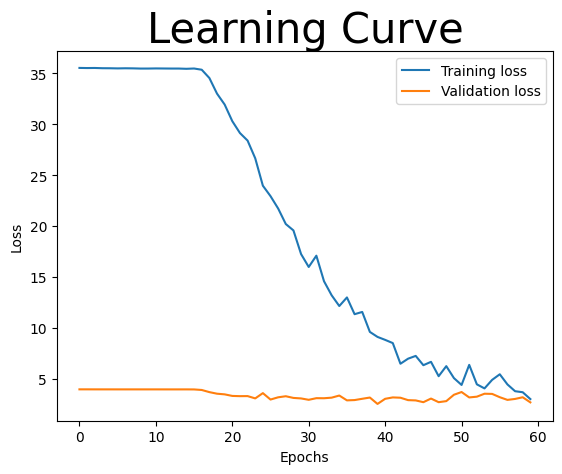

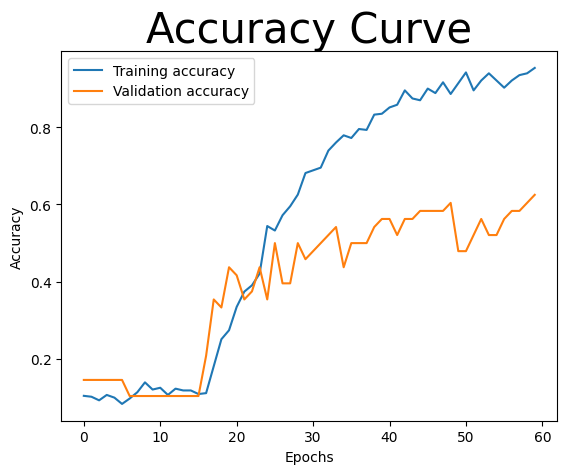

In [ ]:
# learning curve
# Import date class from datetime module
import datetime

execution = datetime.datetime.now()


def learning_curve(v_loss_list, t_loss_list):
  plt.title(label="Learning Curve", fontsize =30)
  plt.plot(range(len(t_loss_list)), t_loss_list, label ='Training loss')
  plt.plot(range(len(v_loss_list)), v_loss_list, label='Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  #plt.yscale("log")
  plt.legend()
  plt.savefig(save_location+'/learningCuve'+'finForestRun'+'lr1e-4_'+'wd1e-5_'+'ep30_'+str(execution)+'.png') #run_name
  plt.show()
  # save figs


def accuracy_curve(v_accuracy_list, t_accuracy_list):
  plt.title(label="Accuracy Curve", fontsize =30)
  plt.plot(range(len(t_accuracy_list)), t_accuracy_list, label ='Training accuracy')
  plt.plot(range(len(v_accuracy_list)), v_accuracy_list, label='Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.savefig(save_location+'/accuracyCuve'+'finForestRun'+'lr1e-4_'+'wd1e-5_'+'ep30_'+'.png', format='png')
  plt.show()


learning_curve(v_loss_list, t_loss_list)

accuracy_curve(v_accuracy_list, t_accuracy_list)

In [48]:
## Test loop

model = mod_blank.eval()            #.eval()
torch.no_grad()
loss_fn = torch.nn.MSELoss()
predict_list = []
total_count = 0
num_correct = 0
current_loss = 0

embedding_list = []

epoch = total_epochs

###
# before predict  # act_in act_out
model.linear_1[2].register_forward_hook(get_hook('linear_1[2]'))
###


# print(act_out[]'linear_1.2'])

for idx, img in enumerate(x_test):

  tense_img = tensoring(img)
  prediction = model.forward(tense_img)
  label = label_oh_tf(y_test[idx])

  embedding = act_out['linear_1[2]']

  loss = loss_fn(prediction, label)
  predict_list.append(prediction.argmax())
  embedding_list.append(embedding)

  ####
  ####

  print('\n ---------------------------------------------------------------')
  print('             Epoch: ', epoch, '  Sample: ', idx)

  if prediction.argmax() == label.argmax():
      print('\n ########################### HIT ########################### \n')
      num_correct +=1
  else:
    print('\n ########################### MISS ########################### \n')

  total_count+=1

  print('ArgPrediction: ', prediction.argmax()) #, prediction,'ARRRGGGG',
  print('Label: ',label.argmax())
  #print('Loss: ', loss.item())
  print('---------------------------------------------------------------')
  print(" |||| ||||| ||||| ||||| ||||| ||||| |||| |||| ||||| |||| |||| ")

  current_loss += loss.item()


print('/////////////////////////////////////////////////')

print('Testing Results')

print('/////////////////////////////////////////////////')

print('Correct Answers: ', num_correct)
print('Total Questions: ', total_count)
print('% Accuracy: ', 100 * (num_correct / total_count))

tensor([0.0000, 0.0000, 0.0457, 0.0022, 0.0000, 0.0000, 0.0990, 0.0000, 0.0000,
        0.0000, 0.0483, 0.0715, 0.0709, 0.0814, 0.0268, 0.0298, 0.0000, 0.0224,
        0.0000, 0.0060, 0.0000, 0.0000, 0.0061, 0.0000, 0.0163, 0.0000, 0.0033,
        0.0000, 0.0551, 0.0000, 0.0913, 0.0018, 0.0603, 0.0939, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0272, 0.0000, 0.0069, 0.0932, 0.0892, 0.0000,
        0.0000, 0.0000, 0.0694, 0.0000, 0.0000, 0.0000, 0.0170, 0.0000, 0.0228,
        0.0478, 0.0000, 0.0000, 0.0631, 0.0741, 0.0978, 0.0000, 0.0000, 0.0631,
        0.0000, 0.0514, 0.0000, 0.0927, 0.0602, 0.0000, 0.0000, 0.0000, 0.0082,
        0.0145, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0537, 0.0854, 0.0274,
        0.0163, 0.0000, 0.0000, 0.0441, 0.0000, 0.0080, 0.0000, 0.0000, 0.0000,
        0.0457, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0521, 0.0827, 0.0000,
        0.0000], device='cuda:0', grad_fn=<ReluBackward0>)

 -----------------------------------------------------------

In [51]:
print(embedding_list[0:1])

[tensor([-0.0622, -0.0556,  0.0457,  0.0022, -0.0548, -0.0261,  0.0990, -0.0201,
        -0.0248, -0.0217,  0.0483,  0.0715,  0.0709,  0.0814,  0.0268,  0.0298,
        -0.0064,  0.0224, -0.0096,  0.0060, -0.0478, -0.0244,  0.0061, -0.0588,
         0.0163, -0.0910,  0.0033, -0.0509,  0.0551, -0.0938,  0.0913,  0.0018,
         0.0603,  0.0939, -0.0357, -0.0863, -0.0090, -0.0069, -0.0667,  0.0272,
        -0.0315,  0.0069,  0.0932,  0.0892, -0.0281, -0.0444, -0.0766,  0.0694,
        -0.0934, -0.0967, -0.0552,  0.0170, -0.0802,  0.0228,  0.0478, -0.0694,
        -0.0198,  0.0631,  0.0741,  0.0978, -0.0617, -0.0772,  0.0631, -0.0095,
         0.0514, -0.0326,  0.0927,  0.0602, -0.0691, -0.0542, -0.0740,  0.0082,
         0.0145, -0.0255, -0.0555, -0.0706, -0.0483, -0.0802,  0.0537,  0.0854,
         0.0274,  0.0163, -0.0008, -0.0672,  0.0441, -0.0284,  0.0080, -0.0564,
        -0.0494, -0.0927,  0.0457, -0.0221, -0.0753, -0.0793, -0.0521, -0.0741,
         0.0521,  0.0827, -0.0449, -0.0

In [ ]:
# confusion matrix
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


epoch_in_question =-1

Y_train= [int(y) for y in y_train]
Y_val= [int(v) for v in y_val]

final_t_pred =[x.cpu() for x in t_predict_list[epoch_in_question]]
final_v_pred =[x.cpu() for x in v_predict_list[epoch_in_question]]

t_predict_list_test = [x.cpu() for j in t_predict_list for x in j]

print(t_predict_list_test[0])
print('\n Training Confusion matrix')
train_epoch_matrix = confusion_matrix(Y_train, final_t_pred)
disp= ConfusionMatrixDisplay(train_epoch_matrix, display_labels=[0,1,2,3,4,5,6,7,8,9,10])
disp.plot()
plt.show()

print('\n Validation Confusion matrix')
val_epoch_matrix = confusion_matrix(Y_val, final_v_pred)
disp= ConfusionMatrixDisplay(val_epoch_matrix, display_labels=[0,1,2,3,4,5,6,7,8,9,10])
disp.plot()
plt.show()


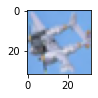

NameError: name 'model' is not defined

In [ ]:
# seeing if validation works
i = 144
test_im = x_val[i]
test_y = y_val[i]

plt.subplot(330 + 1 + 2)
plt.imshow(test_im, cmap=plt.get_cmap('gray'))
plt.show()



tense_im = tensoring(test_im)
prediction_test = model.forward(tense_im)


num_classes = 10
one_hot = np.zeros(num_classes)
one_hot[test_y] = 1


label = torch.tensor(one_hot)
label = label.to(torch.float32)

print(' \n Prediction:  ',prediction_test.argmax())
print('\n LabeL: ',label.argmax())

In [ ]:
mod = vgg16TorchNet().to(device)

In [37]:
# load saved pickle model for graphs or further training

import pickle


#forest_colab_HyperparameterSweep_120723_forest_v14_epoch30_lr0.0001_Adam_MSELoss()_Acc_0.953_0.625_schholcompREF

#First_Half = "/forest_colab_HyperparameterSweep_120723_forest_v14_epoch30_lr0.0001_Adam_MSELoss()_Acc_0.681_0.458_schholcompREF.pkl"
#Second_Half =  "/forest_colab_HyperparameterSweep_120723_forest_v14_epoch30_lr0.0001_Adam_MSELoss()_Acc_0.953_0.625_schholcompREF.pkl"
file_name = '/_IDSWforest_epoch6_130723_extra64lay_epoch37_lr0.0001_Adam_MSELoss()+_Acc_0.9488372093023256_0.625.pkl'
model = vgg16TorchNet().to(device)

# /content/drive/MyDrive/IDSW
load_epoch= -1
#MNIST_Simple_3_layer_Antnet_Epoch_250523_24_0.05_ReLU_2linear.pkl

with open(save_location+f''+file_name, 'rb') as f:
    save_dict = pickle.load(f)

"""
with open(save_location+f''+First_Half, 'rb') as f:
    fsave_dict = pickle.load(f)

with open(save_location+f''+Second_Half, 'rb') as s:
    ssave_dict = pickle.load(s)

ft_loss_list = fsave_dict['t_loss_list']
ft_accuracy_list = fsave_dict['t_accuracy_list']
fv_loss_list = fsave_dict['v_loss_list']
fv_accuracy_list = fsave_dict['v_accuracy_list']

st_loss_list = ssave_dict['t_loss_list']
st_accuracy_list = ssave_dict['t_accuracy_list']
sv_loss_list = ssave_dict['v_loss_list']
sv_accuracy_list = ssave_dict['v_accuracy_list']

###
t_loss_list = ft_loss_list+st_loss_list
t_accuracy_list = ft_accuracy_list+st_accuracy_list

v_loss_list = fv_loss_list+sv_loss_list
v_accuracy_list = fv_accuracy_list+sv_accuracy_list

"""


#loss lists and predict lists

# Access dictionary elements
run_name = save_dict['Run']
total_epochs = save_dict['Current Epoch']
model_state_dict = save_dict['model.state_dict']
training_samples = save_dict['training_samples']
validation_samples = save_dict['validation_samples']

t_loss_list = save_dict['t_loss_list']
t_predict_list = save_dict['t_predict_list']
t_accuracy_list = save_dict['t_accuracy_list']

v_loss_list = save_dict['v_loss_list']
v_predict_list = save_dict['v_predict_list']
v_accuracy_list = save_dict['v_accuracy_list']

# Load model state
model.load_state_dict(model_state_dict)

<All keys matched successfully>

In [ ]:
print(mod_blank.state_dict()['linear_1.6.weight'].shape)
print(mod_blank.state_dict()['linear_1.6.bias'].shape)

print('.\\\.\\\.\\\.\\\.\\\.\\\.')

print(model.state_dict()['linear_1.5.weight'].shape)
print(model.state_dict()['linear_1.5.bias'].shape)

torch.Size([11, 100])
torch.Size([11])
.\\.\\.\\.\\.\\.\\.
torch.Size([11, 100])
torch.Size([11])


In [38]:
""" We want to get the pretrained model
To have the same labels as the blank model

model has 5, needs 6 """

save_trainedmod = model #
save_blank = mod_blank

print(save_trainedmod.state_dict().keys()) #
trained_Dict = save_trainedmod.state_dict()

trained_Dict['linear_1.6.weight'] =  model.state_dict()['linear_1.5.weight']
trained_Dict['linear_1.6.bias'] =  model.state_dict()['linear_1.5.bias']

#save_trainedmod.state_dict()['linear_1.6.weight'] =  model.state_dict()['linear_1.5.weight']  #'linear_1.5.weight', 'linear_1.5.bias'
#save_trainedmod.state_dict()['linear_1.6.bias'] =  model.state_dict()['linear_1.5.bias']

print(trained_Dict.keys()) # this should have linear_1.6.weight & b

odict_keys(['conv_layers.0.weight', 'conv_layers.0.bias', 'conv_layers.3.weight', 'conv_layers.3.bias', 'conv_layers.5.weight', 'conv_layers.5.bias', 'conv_layers.8.weight', 'conv_layers.8.bias', 'conv_layers.10.weight', 'conv_layers.10.bias', 'conv_layers.13.weight', 'conv_layers.13.bias', 'conv_layers.15.weight', 'conv_layers.15.bias', 'linear_1.0.weight', 'linear_1.0.bias', 'linear_1.2.weight', 'linear_1.2.bias', 'linear_1.5.weight', 'linear_1.5.bias'])
odict_keys(['conv_layers.0.weight', 'conv_layers.0.bias', 'conv_layers.3.weight', 'conv_layers.3.bias', 'conv_layers.5.weight', 'conv_layers.5.bias', 'conv_layers.8.weight', 'conv_layers.8.bias', 'conv_layers.10.weight', 'conv_layers.10.bias', 'conv_layers.13.weight', 'conv_layers.13.bias', 'conv_layers.15.weight', 'conv_layers.15.bias', 'linear_1.0.weight', 'linear_1.0.bias', 'linear_1.2.weight', 'linear_1.2.bias', 'linear_1.5.weight', 'linear_1.5.bias', 'linear_1.6.weight', 'linear_1.6.bias'])


In [39]:
print(trained_Dict['linear_1.6.weight'])
print('//...////.....////.../')
print(trained_Dict['linear_1.6.weight'])


tensor([[-0.0320, -0.0354, -0.0988,  ..., -0.0140, -0.0326, -0.0602],
        [-0.0518, -0.1141, -0.0302,  ..., -0.0354, -0.0378, -0.0247],
        [ 0.0197, -0.1322, -0.1243,  ...,  0.0441, -0.0466,  0.0293],
        ...,
        [-0.0135,  0.0032, -0.0371,  ...,  0.0578, -0.0966, -0.0696],
        [-0.1025,  0.0244, -0.0635,  ..., -0.0220, -0.0813, -0.0179],
        [-0.1839,  0.0478,  0.0579,  ...,  0.0378, -0.0671, -0.0009]],
       device='cuda:0')
//...////.....////.../
tensor([[-0.0320, -0.0354, -0.0988,  ..., -0.0140, -0.0326, -0.0602],
        [-0.0518, -0.1141, -0.0302,  ..., -0.0354, -0.0378, -0.0247],
        [ 0.0197, -0.1322, -0.1243,  ...,  0.0441, -0.0466,  0.0293],
        ...,
        [-0.0135,  0.0032, -0.0371,  ...,  0.0578, -0.0966, -0.0696],
        [-0.1025,  0.0244, -0.0635,  ..., -0.0220, -0.0813, -0.0179],
        [-0.1839,  0.0478,  0.0579,  ...,  0.0378, -0.0671, -0.0009]],
       device='cuda:0')


In [40]:
trained_Dict.pop('linear_1.5.weight')
trained_Dict.pop('linear_1.5.bias')

print(trained_Dict.keys())

odict_keys(['conv_layers.0.weight', 'conv_layers.0.bias', 'conv_layers.3.weight', 'conv_layers.3.bias', 'conv_layers.5.weight', 'conv_layers.5.bias', 'conv_layers.8.weight', 'conv_layers.8.bias', 'conv_layers.10.weight', 'conv_layers.10.bias', 'conv_layers.13.weight', 'conv_layers.13.bias', 'conv_layers.15.weight', 'conv_layers.15.bias', 'linear_1.0.weight', 'linear_1.0.bias', 'linear_1.2.weight', 'linear_1.2.bias', 'linear_1.6.weight', 'linear_1.6.bias'])


In [ ]:
# load new dict
# mod is the blank model
mod_blank.load_state_dict(trained_Dict) #mod_blank

<All keys matched successfully>

In [ ]:
print(trained_Dict.keys())

odict_keys(['conv_layers.0.weight', 'conv_layers.0.bias', 'conv_layers.3.weight', 'conv_layers.3.bias', 'conv_layers.5.weight', 'conv_layers.5.bias', 'conv_layers.8.weight', 'conv_layers.8.bias', 'conv_layers.10.weight', 'conv_layers.10.bias', 'conv_layers.13.weight', 'conv_layers.13.bias', 'conv_layers.15.weight', 'conv_layers.15.bias', 'linear_1.0.weight', 'linear_1.0.bias', 'linear_1.2.weight', 'linear_1.2.bias', 'linear_1.6.weight', 'linear_1.6.bias'])


In [ ]:
print(mod_blank.state_dict().keys())

#model_blank_save = mod_blank.state_dict

#print(model_blank_save.keys())

odict_keys(['conv_layers.0.weight', 'conv_layers.0.bias', 'conv_layers.3.weight', 'conv_layers.3.bias', 'conv_layers.5.weight', 'conv_layers.5.bias', 'conv_layers.8.weight', 'conv_layers.8.bias', 'conv_layers.10.weight', 'conv_layers.10.bias', 'conv_layers.13.weight', 'conv_layers.13.bias', 'conv_layers.15.weight', 'conv_layers.15.bias', 'linear_1.0.weight', 'linear_1.0.bias', 'linear_1.2.weight', 'linear_1.2.bias', 'linear_1.6.weight', 'linear_1.6.bias'])


In [ ]:
print(model.state_dict().keys())

odict_keys(['conv_layers.0.weight', 'conv_layers.0.bias', 'conv_layers.3.weight', 'conv_layers.3.bias', 'conv_layers.5.weight', 'conv_layers.5.bias', 'conv_layers.8.weight', 'conv_layers.8.bias', 'conv_layers.10.weight', 'conv_layers.10.bias', 'conv_layers.13.weight', 'conv_layers.13.bias', 'conv_layers.15.weight', 'conv_layers.15.bias', 'linear_1.0.weight', 'linear_1.0.bias', 'linear_1.2.weight', 'linear_1.2.bias', 'linear_1.5.weight', 'linear_1.5.bias'])


In [ ]:
print(model.state_dict)

In [ ]:
print(model_state_dict)

In [ ]:
print(run_name)

In [ ]:
print(mod.state_dict)

In [ ]:
print(y_train)